# Import Necessary Libraries

In [39]:
import pandas as pd 
import numpy as np 
import csv
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import time 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from matplotlib import markers
markersList = list(markers.MarkerStyle().markers.keys())

In [2]:
mergedFrame1000 = pd.read_csv("../DataSet/engineeredFrame.csv", sep=";", decimal=".")
moreThanOnePercentColumns = pd.read_csv("../DataSet/filterFrame.csv", sep=";", decimal=".")
moreThanOnePercentColumns = moreThanOnePercentColumns.sort_values(by=["columns"], ascending=True)

mergedFrame1000["order_purchase_timestamp"] = pd.to_datetime(mergedFrame1000["order_purchase_timestamp"])
mergedFrame1000["order_delivered_customer_date"] = pd.to_datetime(mergedFrame1000["order_delivered_customer_date"])
mergedFrame1000["order_estimated_delivery_date"] = pd.to_datetime(mergedFrame1000["order_estimated_delivery_date"])
mergedFrame1000

customer_id                customer_unique_id  \
0      51f85bb5c956b0958c65dfefdf996a83  ff6071b8db1b9da6ca797d56bb0136fa   
1      ab15b42d1e768457521c97019caa9918  b08a67dfc3133fb089b5a40c28baefe5   
2      d730db8b32b8f68be3ee938849d332dc  a75a727ecfe8c0296c2c816633e64fc2   
3      7baa0b7ec74d65b734e3e2ce04663146  9192ec42ba50dfc66c66a222de052d6a   
4      20362112f844c8a9416e4bd44398ace2  198ab1271f3bb949ef63fe8522bb938d   
...                                 ...                               ...   
49931  388c16174d067179735b31163cb72c21  7098f481051837244058668abd252847   
49932  8f94704bfa222cc9bb083685a9e8e83a  f1468ba3556b19cb648df9c4a8e9a6ea   
49933  2212f1a6763a5a5f8e37750929239ea2  5c2e2226c18ef5423db555fd9e0c8a09   
49934  6a99c3773d7b59274c24abb1efe292b5  9f378c0291194a2985066f2cf3e9ae23   
49935  6bd3cf62d1a263cc4aa9bf23929d9bd1  5089f0a6946d4e3ddd66204b292a981b   

       customer_zip_code_prefix customer_city customer_state  \
0                         66095         belem             PA   
1                          4614     sao paulo             SP   
2                         80530      curitiba             PR   
3                          4550     sao paulo             SP   
4                         38081       uberaba             MG   
...                         ...           ...            ...   
49931                     68455       tucurui             PA   
49932                     14850    pradopolis             SP   
49933                     11050        santos             SP   
49934                      3173     sao paulo             SP   
49935                      5587     sao paulo             SP   

                               order_id order_status order_purchase_timestamp  \
0      944d7c50b61e5da4f70724fe6c541128    delivered      2018-04-27 14:19:52   
1      8733317e2e5debfd2f5d513f545ba3b0    delivered      2018-08-01 23:27:57   
2      c5419fa3198a4e2caeb715ce9fe9a6e2    delivered      2017-03-13 12:58:57   
3      839cdf42ef00fb4f5d66e449058b4d61    delivered      2018-02-12 19:52:06   
4      977ec2dc0bff193996408d1631b22181    delivered      2018-08-02 12:05:57   
...                                 ...          ...                      ...   
49931  949e04ad7b67b1179b05d59b92beb7ba    delivered      2018-01-17 00:31:26   
49932  3cbd4333ba67528bd122a8ad17b73821    delivered      2017-11-19 21:06:33   
49933  77415617cafb4e144386cee170a52698    delivered      2018-03-11 14:28:10   
49934  d1fae75b8b6aec241093c7ccb1a27d3c    delivered      2018-07-23 11:42:25   
49935  cac82deb37cf2bbc3f1ccb5ed31aceb4    delivered      2018-02-21 23:16:18   

         order_approved_at order_delivered_carrier_date  ... NbReviews  \
0      2018-04-28 03:15:25          2018-05-02 12:03:00  ...         1   
1      2018-08-01 23:45:08          2018-08-02 12:35:00  ...         1   
2      2017-03-13 12:58:57          2017-03-14 10:59:09  ...         1   
3      2018-02-12 20:47:22          2018-02-16 15:59:31  ...         1   
4      2018-08-03 02:50:37          2018-08-03 14:38:00  ...         1   
...                    ...                          ...  ...       ...   
49931  2018-01-17 00:39:30          2018-01-17 16:18:14  ...         1   
49932  2017-11-22 03:26:00          2017-11-23 21:51:36  ...         1   
49933  2018-03-11 15:07:58          2018-03-12 17:27:46  ...         1   
49934  2018-07-23 13:43:59          2018-07-24 14:53:00  ...         1   
49935  2018-02-23 02:31:15          2018-02-23 18:48:55  ...         1   

      avgReviewScore  year orderLateInDays orderLateBool seller_stateEnc  \
0                4.0  2018           -15.0             0              14   
1                5.0  2018           -10.0             0              13   
2                5.0  2017           -13.0             0              20   
3                5.0  2018           -11.0             0              13   
4                5.0  2018           -12.0             0              14   
...             

In [3]:
filterC = list(moreThanOnePercentColumns[moreThanOnePercentColumns["isFilter"] == True]["columns"].values)
print(filterC)

['NbReviews', 'avgReviewScore', 'customer_stateEnc', 'nbOrders', 'orderLateBool', 'orderLateInDays', 'orderStatusBool', 'order_delivery_length', 'order_statusEnc', 'payment_sequential', 'payment_typeEnc', 'price', 'product_category_nameEnc', 'returningCustomers', 'review_score', 'seller_stateEnc', 'year']


# Data Standardisation for dataset

In [4]:
X_delivered = mergedFrame1000[mergedFrame1000["order_status"] == "delivered"]
rawFrame = mergedFrame1000.dropna().filter(items=filterC)
X = mergedFrame1000.dropna().filter(items=filterC).values

std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)
print(len(X_scaled))

48219


# MinMax version

In [5]:
minMaxEncoder = preprocessing.MinMaxScaler()
minMaxScaler = minMaxEncoder.fit(rawFrame.values)

X_MinMax = minMaxScaler.transform(rawFrame.values)
print(len(X_MinMax))

48219


# PCA

In [6]:
from sklearn import decomposition
n_components = 6
ratio_sum_MinMax = []
ratio_sum_Scaled = []
for components in range(1, n_components):
    pca = decomposition.PCA(n_components=components)
    pca.fit(X_MinMax)
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum())
    ratio_sum_MinMax.append(pca.explained_variance_ratio_.sum())
    pca.fit(X_scaled)
    ratio_sum_Scaled.append(pca.explained_variance_ratio_.sum())

[0.31246974]
0.31246973744408835
[0.31246974 0.1436751 ]
0.4561448399209753
[0.31246974 0.1436751  0.11496524]
0.5711100795068272
[0.31246974 0.1436751  0.11496524 0.09824886]
0.6693589421101409
[0.31246974 0.1436751  0.11496524 0.09824886 0.08630576]
0.7556647067050829


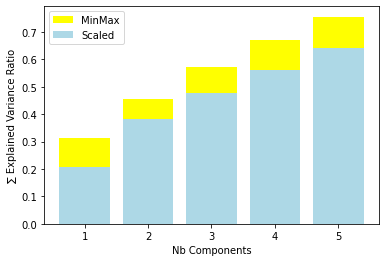

In [7]:
plt.bar(range(1,n_components), ratio_sum_MinMax, label='MinMax', color="yellow")
plt.bar(range(1,n_components), ratio_sum_Scaled, label='Scaled', color="lightblue")
plt.xlabel("Nb Components")
plt.ylabel("∑ Explained Variance Ratio")
plt.legend()

In [55]:
#Best performance so far according to variance ratio with MinMax and 5 components
n_components = 5
pca = decomposition.PCA(n_components=5)
pca.fit(X_MinMax)
X__pca_projected = pca.transform(X_MinMax)

### Données projetées sur les composantes principales et colorée par classement state.

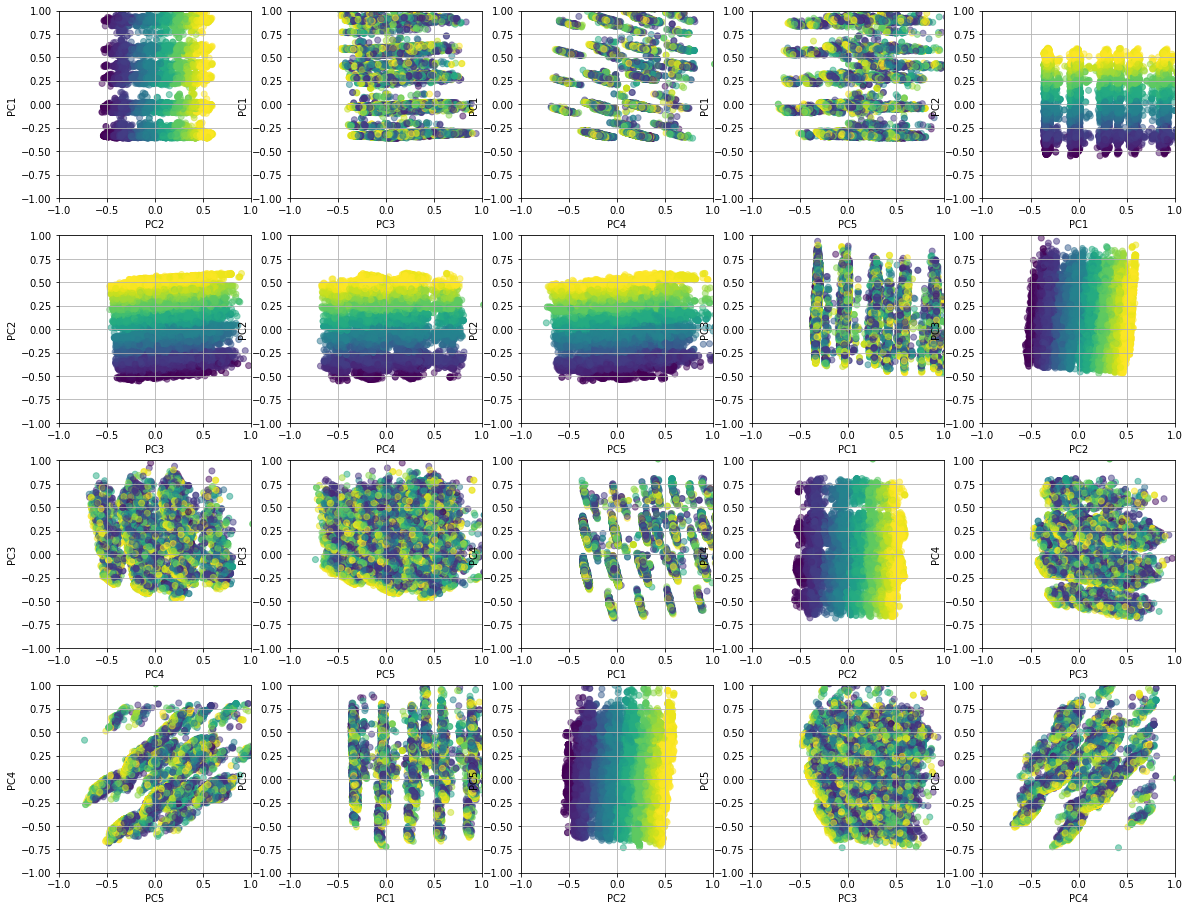

In [9]:
scatter = plt.figure(figsize=(20,20))
subplotIndex = 1



for c in range(n_components):

    # projeter X sur les composantes principales
    
    #ax = scatter.add_subplot(4, 3, (c+1))
    dimension = 'PC'+str(c+1)
    #print(dimension)
    # afficher chaque observation
    for cX in range(n_components):
        if cX != c:
            ax = scatter.add_subplot(n_components, n_components, subplotIndex)
            dimensionX = 'PC'+str(cX+1)
            ax.scatter(X__pca_projected[:, cX], X__pca_projected[:, c],  alpha=0.5, marker="o",
                # colorer en utilisant la variable 'Review Score
                c=rawFrame.dropna().get('product_category_nameEnc'))
                #c=rawFrame.dropna().get('orderLateBool'))
            ax.grid()
            ax.set_ylabel(dimension)
            ax.set_xlabel(dimensionX)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            subplotIndex = subplotIndex+1
    #ax.xlim([-5.5, 5.5])
    #ax.ylim([-4, 4])
    #ax.colorbar()
    #ax.show()

### Contribution de chaque variable aux composantes principales

(-1.0, 1.0)

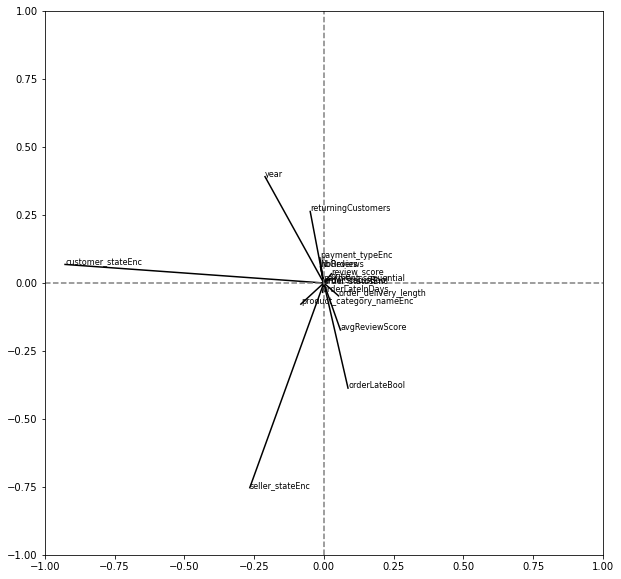

In [11]:
pcs = pca.components_

plt.figure(figsize=(10,10))

for i, (x, y) in enumerate(zip(pcs[2, :], pcs[4, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, filterC[i], fontsize='8')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# NMF
### Only Positive Value and with a set of 48178 MinMaxed data

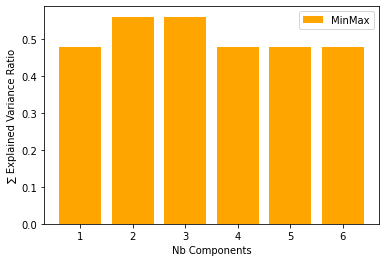

In [12]:
from sklearn import decomposition



#print(nmf.explained_variance_ratio_)
#print(nmf.explained_variance_ratio_.sum())

def get_score(model, data, scorer=metrics.explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

n_components = 7
ratio_sum_MinMax_nmf = []
ratio_sum_Standard_nmf = []


for components in range(1, n_components):
    nmf = decomposition.NMF(n_components=n_components, max_iter=10000, init="random")
    nmf.fit(X_MinMax)
    ratio_sum_MinMax_nmf.append(get_score(nmf, X_MinMax))
plt.bar(range(1,n_components), ratio_sum_MinMax_nmf, label='MinMax', color="orange")
#plt.bar(range(1,n_components), ratio_sum_Scaled, label='Scaled', color="lightblue")
plt.xlabel("Nb Components")
plt.ylabel("∑ Explained Variance Ratio")
plt.legend()

In [14]:
#Best model with 6 components
n_components_nmf = 6
nmf = decomposition.NMF(n_components=n_components_nmf, max_iter=10000, init="random")
nmf.fit(X_MinMax)

NMF(init='random', max_iter=10000, n_components=6)

### Données projetées sur les composantes principales et colorée par classement state.

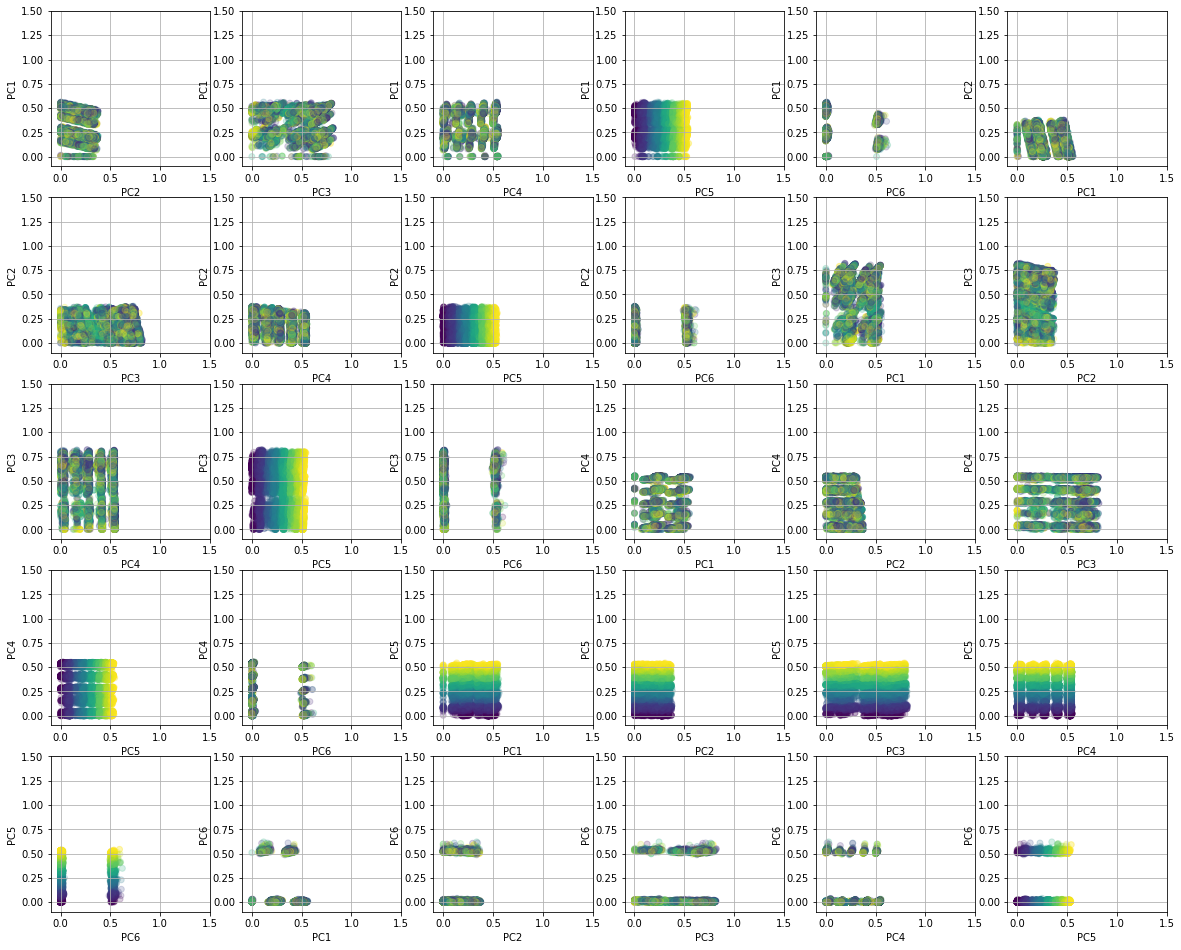

In [15]:
scatter = plt.figure(figsize=(20,20))
subplotIndex = 1
X_nmf_projected = nmf.transform(X_MinMax)

for c in range(n_components_nmf):

    # projeter X sur les composantes principales
    
    #ax = scatter.add_subplot(4, 3, (c+1))
    dimension = 'PC'+str(c+1)
    #print(dimension)
    # afficher chaque observation
    for cX in range(n_components_nmf):
        if cX != c:
            ax = scatter.add_subplot(n_components_nmf, n_components_nmf, subplotIndex)
            dimensionX = 'PC'+str(cX+1)
            ax.scatter(X_nmf_projected[:, cX], X_nmf_projected[:, c],  alpha=0.2, marker="o",
                # colorer en utilisant la variable 'Review Score
                #c=rawFrame.get('returningCustomers'))
                #c=rawFrame.get('orderLateBool'))
                c=rawFrame.get('product_category_nameEnc'))
            
                #c=rawFrame[:20000].get('year'))
            
                #c=X_delivered.dropna().get('returningCustomers'))
            ax.grid()
            ax.set_ylabel(dimension)
            ax.set_xlabel(dimensionX)
            ax.set_xlim([-0.1, 1.5])
            ax.set_ylim([-0.1, 1.5])
            subplotIndex = subplotIndex+1
    #ax.xlim([-5.5, 5.5])
    #ax.ylim([-4, 4])
    #ax.colorbar()
    #ax.show()

# Contribution de chaque variable aux composantes principales

(0.0, 2.5)

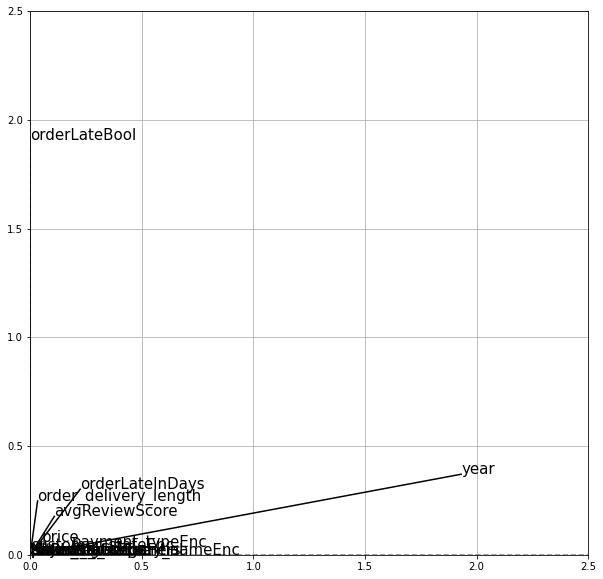

In [16]:
nmfs = nmf.components_
contribution = plt.figure(figsize=(10,10))

for i, (x, y) in enumerate(zip(nmfs[0, :], nmfs[5, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, filterC[i], fontsize='15')

# Afficher une ligne horizontale y=0
plt.plot([0, 2.5], [0, 0], color='grey', ls='--')
plt.grid()
# Afficher une ligne verticale x=0
plt.plot([0, 0], [0, 2], color='grey', ls='--')

plt.xlim([0, 2.5])
plt.ylim([0, 2.5])

# FactorAnalysis


925.8295922279358


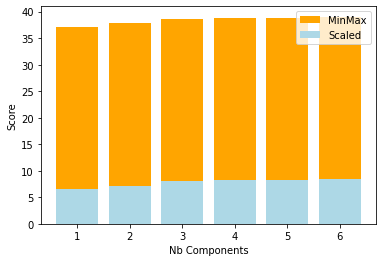

In [16]:
from sklearn import decomposition
start_time = time.time()
#print(X_MinMax.shape)
factor = decomposition.FactorAnalysis(n_components=n_components, max_iter=5000)
#factor.fit(X_scaled)
#X_factor_projected = factor.transform(X_scaled)


ratio_sum_MinMax_factor = []
ratio_sum_Scaled_factor = []

for components in range(1, n_components):
    factor = decomposition.FactorAnalysis(n_components=components, max_iter=5000)
    factor.fit(X_MinMax)
    ratio_sum_MinMax_factor.append(factor.score(X_MinMax))
    factor.fit(X_scaled)
    ratio_sum_Scaled_factor.append(factor.score(X_scaled))
    
plt.bar(range(1,n_components), ratio_sum_MinMax_factor, label='MinMax', color="orange")
plt.bar(range(1,n_components), ratio_sum_Scaled_factor, label='Scaled', color="lightblue")
#plt.bar(range(1,n_components), ratio_sum_Scaled, label='Scaled', color="lightblue")
plt.xlabel("Nb Components")
plt.ylabel("Score")
plt.legend()

print(str(time.time()-start_time))

In [44]:
#factor best model 
n_components_factor = 6
factor = decomposition.FactorAnalysis(n_components=n_components_factor, max_iter=5000)
factor.fit(X_MinMax)
X_factor_projected = factor.transform(X_MinMax)

0.8022317886352539


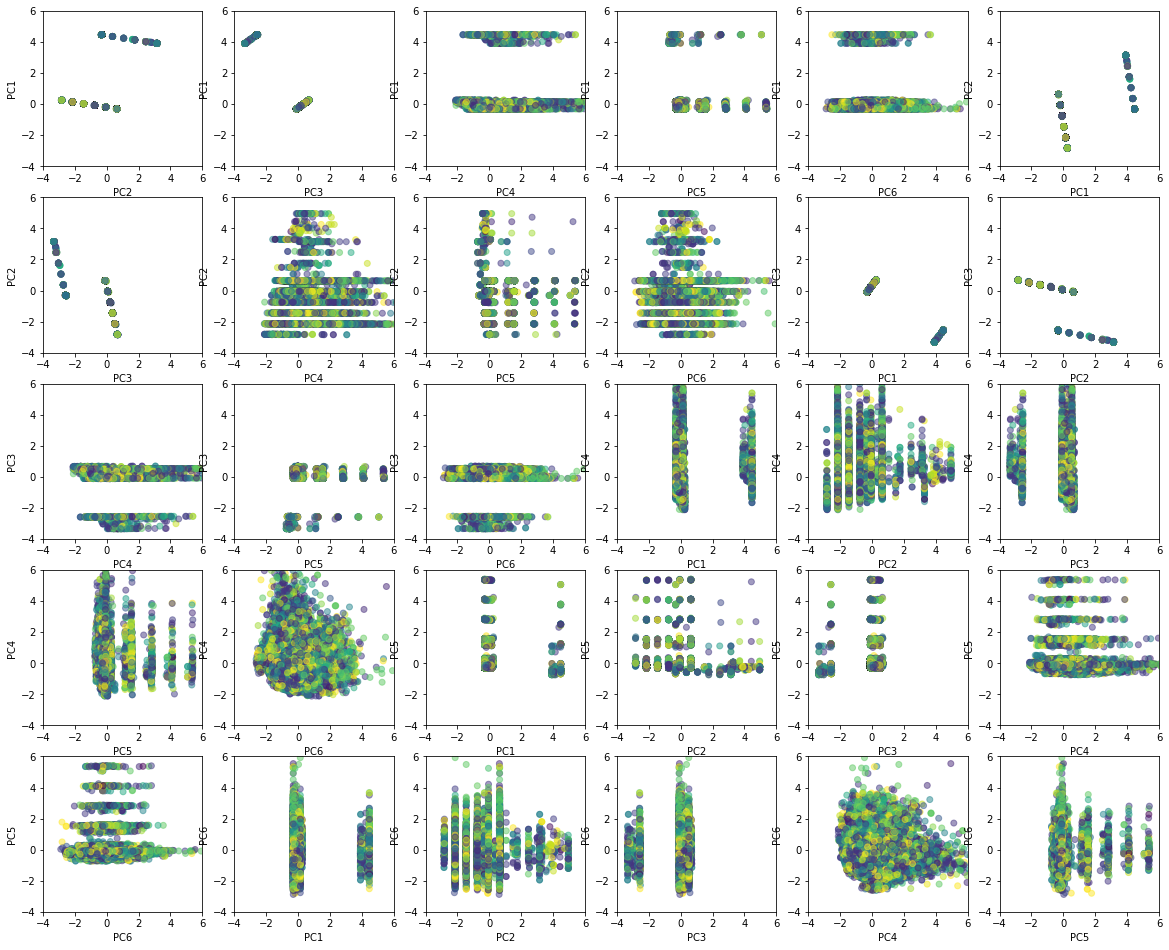

In [18]:
scatter = plt.figure(figsize=(20,20))
subplotIndex = 1
n_components = 6
start_time = time.time()

for c in range(n_components_factor):
    
    # projeter X sur les composantes principales
    
    #ax = scatter.add_subplot(4, 3, (c+1))
    dimension = 'PC'+str(c+1)
    #print(dimension)
    # afficher chaque observation
    for cX in range(n_components_factor):
        if cX != c:
            ax = scatter.add_subplot(n_components_factor, n_components_factor, subplotIndex)
            dimensionX = 'PC'+str(cX+1)
            ax.scatter(X_factor_projected[:, cX], X_factor_projected[:, c],  alpha=0.5, marker="o",
                # colorer en utilisant la variable 'Review Score
                c=rawFrame.get('product_category_nameEnc'))
                #c=rawFrame[:5000].get('orderLateBool'))
                #c=mergedFrame1000.dropna().get('product_category_nameEnc'))
            ax.set_ylabel(dimension)
            ax.set_xlabel(dimensionX)
            ax.set_xlim([-4, 6])
            ax.set_ylim([-4, 6])
            subplotIndex = subplotIndex+1
    #ax.xlim([-5.5, 5.5])
    #ax.ylim([-4, 4])
    #ax.colorbar()
    #ax.show()
print(str(time.time()-start_time))

# Kernel PCA

In [21]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

X_light = rawFrame.sample(5000).dropna().values

X_light_MinMax = minMaxEncoder.transform(X_light)

randomIndexes = np.random.choice(X_scaled.shape[0], 
                                  size=5000, 
                                  replace=False)
X_scaled_light = X_MinMax[randomIndexes]

start_time = time.time()
param_grid = [{
    "n_components": range(2,6), 
    "gamma": np.linspace(-0.1, 0.1, 5),
    "kernel": ["rbf"]
}]

kernel = KernelPCA(fit_inverse_transform=True,)
kpca = GridSearchCV(kernel, param_grid, scoring=my_scorer)
kpca.fit(X_light_MinMax)

print(kpca.best_params_)
print(str(time.time()-start_time))

{'gamma': 0.1, 'kernel': 'rbf', 'n_components': 5}
154.38711404800415


In [22]:
#Best model for Kpca 
X_KPCA_projected = kpca.best_estimator_.transform(X_light_MinMax)

0.8155579566955566


<Figure size 720x720 with 0 Axes>

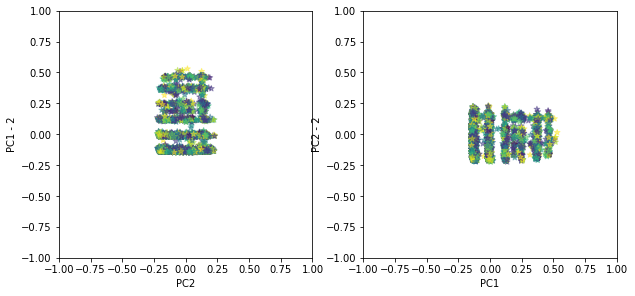

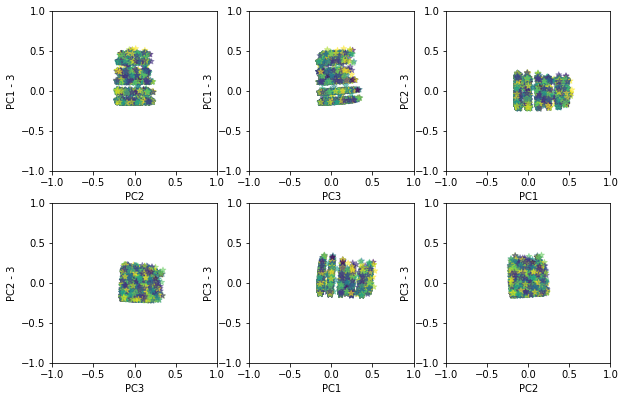

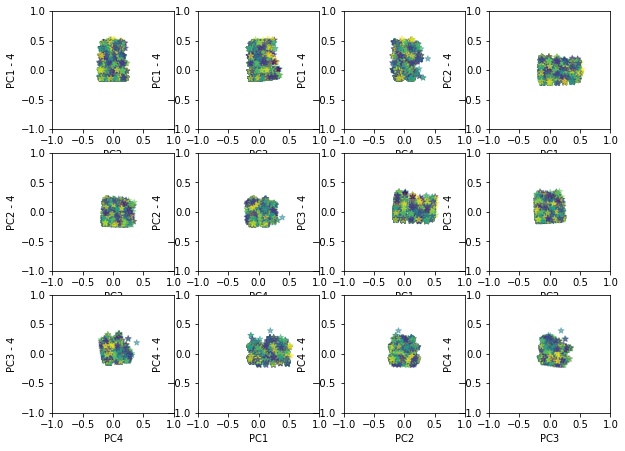

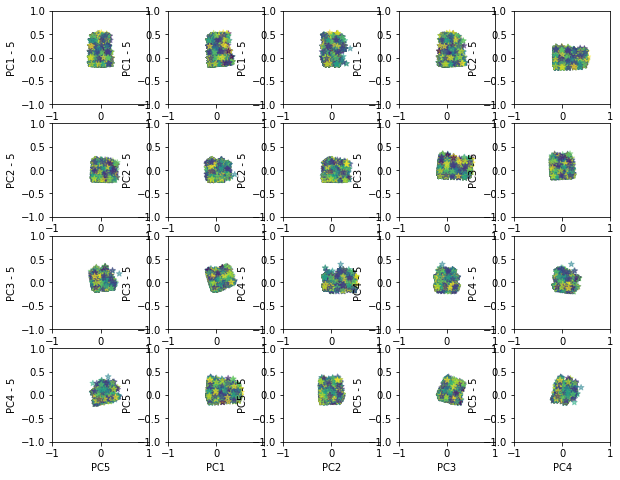

In [28]:
start_time = time.time()

for n_components in range(1, 6):
    scatter = plt.figure(figsize=(10,10))
    subplotIndex = 1


    for c in range(n_components):
        #print(c)
        # projeter X sur les composantes principales
        

        #print(np.unique(X_KPCA_projected))
        #ax = scatter.add_subplot(4, 3, (c+1))
        dimension = 'PC'+str(c+1) + " - " + str(n_components)
        #print(dimension)
        # afficher chaque observation
        for cX in range(n_components):
            if cX != c:
                ax = scatter.add_subplot(n_components, n_components, subplotIndex)
                dimensionX = 'PC'+str(cX+1)
                ax.scatter(X_KPCA_projected[:, cX], X_KPCA_projected[:, c],
                           alpha=0.5,
                           marker="*",
                    # colorer en utilisant la variable 'Review Score ou product_category_nameEnc
                    #c=rawFrame.iloc[randomIndexes].get('returningCustomers'))
                    #c=rawFrame.iloc[randomIndexes].get('orderLateBool'))
                    c=rawFrame.iloc[randomIndexes].get('product_category_nameEnc'))
                    #c=X_KPCA_projected)
                ax.set_ylabel(dimension)
                ax.set_xlabel(dimensionX)
                ax.set_xlim([-1, 1])
                ax.set_ylim([-1, 1])
                subplotIndex = subplotIndex+1
        #ax.xlim([-5.5, 5.5])
        #ax.ylim([-4, 4])
        #ax.colorbar()
        #ax.show()
print(str(time.time()-start_time))

# TSNE

Need to be fed with PCA components.

In [37]:
time_start = time.time()
resultFrame = pd.DataFrame(columns=["tsne-2d-one", "tsne-2d-two"])

#print("columns", mergedFrame.dropna().filter(items=filterC).columns)

for n_components in range(2, 4):
    for column in range(n_components):
        for perpl in [40]:

            tsne = TSNE(n_components=n_components, verbose=1, perplexity=perpl, n_iter=250)
            tsne_results = tsne.fit_transform(X_scaled)

            resultFrame['tsne-2d-one'] = tsne_results[:,(column-1)]
            resultFrame['tsne-2d-two'] = tsne_results[:, column]


            colors = rawFrame["returningCustomers"].values

            title = "T SNE Visuals_"+"_"+str(n_components)+"_returningCustomers_"+str(perpl)
            figure = resultFrame.plot.scatter(x="tsne-2d-one",
                                  figsize=(20,15),
                                  y="tsne-2d-two",
                                  c=colors,
                                  title=title,
                                  xlabel="tsne-2d-one",
                                  #xscale={"linear"},
                                  marker = 'o',   alpha = 0.4,
                                  colormap='viridis').get_figure()
            plt.show()
            figure.savefig("VisualsTsne/"+title+".jpg")
    print(str(time.time()-time_start))

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

# Kmeans

Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features.


While k-means is very good at identifying <b>clusters with a spherical shape</b>, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, k, a priori. An inappropriate choice for k can result in poor clustering performance — we will discuss later in this tutorial how to choose k.

# The Elbow Method

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

#### no preprocessing

1  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 1, 'n_init': 5, 'random_state': 0, 'tol': 0.1}
2  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 2, 'n_init': 15, 'random_state': 0, 'tol': 0.1}
3  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 3, 'n_init': 10, 'random_state': 5, 'tol': 1.0}
4  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 4, 'n_init': 10, 'random_state': 0, 'tol': 1.0}
5  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 5, 'n_init': 10, 'random_state': 15, 'tol': 10.0}
6  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 6, 'n_init': 15, 'random_state': 10, 'tol': 10.0}
7  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 7, 'n_init': 15, 'random_state': 10, 'tol': 3.1622776601683795}
8  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 8, 'n_init': 10, 'random_state': 0, 'tol': 0.1}
9  Best Params {'init': 'k-means++', 'max_iter':

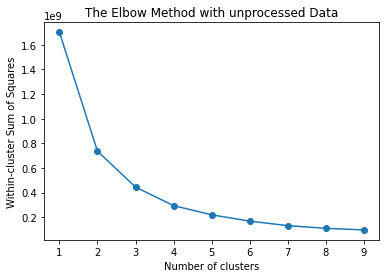

1366.1581921577454


In [16]:

time_start = time.time()
# calculate distortion for a range of number of cluster
distortions = []


for i in range(1, 10):
    param_grid = [{
    "n_clusters": [i],
    "max_iter": [1000],
    "tol": np.logspace(-1, 1, 5),
    "init": ["random", "k-means++"],
    "n_init": range(5, 20, 5),
    "random_state": range(0, 20, 5)
}]
    km = KMeans()
    kmElbow = GridSearchCV(km, param_grid)
    kmElbow.fit(rawFrame.values)
    print(i, " Best Params", kmElbow.best_params_)
    distortions.append(kmElbow.best_estimator_.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.title('The Elbow Method with unprocessed Data')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()
print(str(time.time()-time_start))

### With Scaled data

1  Best Params {'init': 'random', 'max_iter': 2000, 'n_clusters': 1, 'n_init': 5, 'random_state': 0, 'tol': 0.1}
[0 0 0 ... 0 0 0]
2  Best Params {'init': 'random', 'max_iter': 2000, 'n_clusters': 2, 'n_init': 5, 'random_state': 15, 'tol': 0.1}
[0 1 1 ... 1 1 1]
3  Best Params {'init': 'k-means++', 'max_iter': 2000, 'n_clusters': 3, 'n_init': 15, 'random_state': 15, 'tol': 1.0}
[0 0 0 ... 0 0 0]
4  Best Params {'init': 'k-means++', 'max_iter': 2000, 'n_clusters': 4, 'n_init': 10, 'random_state': 15, 'tol': 0.1}
[0 0 0 ... 2 2 0]
5  Best Params {'init': 'random', 'max_iter': 2000, 'n_clusters': 5, 'n_init': 10, 'random_state': 5, 'tol': 0.1}
[3 3 3 ... 4 4 3]
6  Best Params {'init': 'random', 'max_iter': 2000, 'n_clusters': 6, 'n_init': 15, 'random_state': 15, 'tol': 0.1}
[5 0 1 ... 0 0 1]
7  Best Params {'init': 'k-means++', 'max_iter': 2000, 'n_clusters': 7, 'n_init': 15, 'random_state': 0, 'tol': 0.1}
[1 5 5 ... 5 5 5]


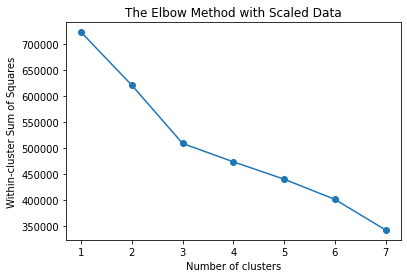

959.2082989215851


In [17]:
# calculate distortion for a range of number of cluster
distortions_scaled = []
best_params_scaled = []
Y_km_scaled = [] 
km_best_scaled = []
silhouette_scores_scaled = []
time_start = time.time()

for i in range(1, 8):
    param_grid = [{
    "n_clusters": [i],
    "max_iter": [2000],
    "tol": np.logspace(-1, 1, 5),
    "init": ["random", "k-means++"],
    "n_init": range(5, 16, 5),
    "random_state": range(0, 16, 5)
}]
    
    km = KMeans()
    kmElbow = GridSearchCV(km, param_grid)
    kmElbow.fit(X_scaled)
    print(i, " Best Params", kmElbow.best_params_)
    distortions_scaled.append(kmElbow.best_estimator_.inertia_)
    
    best_params_scaled.append(kmElbow.best_params_)
    
    y_km = kmElbow.best_estimator_.predict(X_scaled)
    
    if i > 1:
        silhouette__coef = silhouette_score(X_scaled, y_km)
        silhouette_scores_scaled.append(silhouette__coef)
    
    print(y_km)
    km_best_scaled.append(kmElbow.best_estimator_)   
    Y_km_scaled.append(y_km)

# plot
plt.plot(range(1, 8), distortions_scaled, marker='o')
plt.title('The Elbow Method with Scaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()
print(str(time.time()-time_start))

Ici le coude est beaucoup plus marqué et se présente entre 2 et 4 clusters. C'est la meilleure approche pour le moment. 


# With PCA 

1  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 1, 'n_init': 5, 'random_state': 0, 'tol': 0.1}
[0 0 0 ... 0 0 0]
2  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 2, 'n_init': 10, 'random_state': 10, 'tol': 0.31622776601683794}
[1 1 1 ... 0 1 1]
3  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 3, 'n_init': 15, 'random_state': 0, 'tol': 0.1}
[0 1 1 ... 1 1 1]
4  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 4, 'n_init': 15, 'random_state': 0, 'tol': 0.1}
[1 3 3 ... 3 3 3]
5  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 5, 'n_init': 15, 'random_state': 15, 'tol': 0.1}
[2 3 3 ... 3 3 3]
6  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 6, 'n_init': 15, 'random_state': 10, 'tol': 0.1}
[1 5 4 ... 5 5 5]
7  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 7, 'n_init': 15, 'random_state': 10, 'tol': 0.1}
[2 4 0 ... 4 4 4]


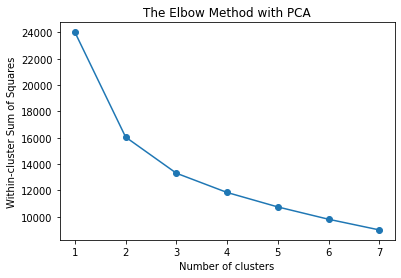

614.6325671672821


In [40]:
# calculate distortion for a range of number of cluster
distortions_pca = []
best_params_pca = []
Y_km_pca = [] 
km_best_pca = []
silhouette_scores_pca = []

time_start = time.time()

for i in range(1, 8):
    param_grid = [{
    "n_clusters": [i],
    "max_iter": [1000],
    "tol": np.logspace(-1, 1, 5),
    "init": ["random", "k-means++"],
    "n_init": range(5, 16, 5),
    "random_state": range(0, 16, 5)
}]
    km = KMeans()
    kmElbow = GridSearchCV(km, param_grid)
    kmElbow.fit(X__pca_projected)
    
    print(i, " Best Params", kmElbow.best_params_)
    distortions_pca.append(kmElbow.best_estimator_.inertia_)
    
    best_params_pca.append(kmElbow.best_params_)
    
    y_km = kmElbow.best_estimator_.predict(X__pca_projected)
    
    if i > 1:
        silhouette__coef = silhouette_score(X__pca_projected, y_km)
        silhouette_scores_pca.append(silhouette__coef)
    
    print(y_km)
    km_best_pca.append(kmElbow.best_estimator_)   
    Y_km_pca.append(y_km)

# plot
plt.plot(range(1, 8), distortions_pca, marker='o')
plt.title('The Elbow Method with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

print(str(time.time()-time_start))

Un léger coude apparait entre 2 et 3 clusters mais c'est plus probant en MinMax quand scaled

# with NMF

1  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 1, 'n_init': 5, 'random_state': 0, 'tol': 0.1}
[0 0 0 ... 0 0 0]
2  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 2, 'n_init': 15, 'random_state': 10, 'tol': 0.1}
[1 1 1 ... 1 1 1]
3  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 3, 'n_init': 10, 'random_state': 0, 'tol': 0.1}
[1 1 2 ... 1 2 2]
4  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 4, 'n_init': 15, 'random_state': 15, 'tol': 0.1}
[0 2 2 ... 2 2 2]
5  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 5, 'n_init': 10, 'random_state': 5, 'tol': 0.1}
[1 0 0 ... 0 0 0]
6  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 6, 'n_init': 15, 'random_state': 5, 'tol': 0.1}
[2 1 0 ... 1 1 1]
7  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 7, 'n_init': 15, 'random_state': 0, 'tol': 0.1}
[1 2 0 ... 2 2 2]


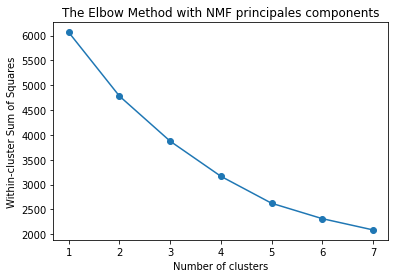

641.5434830188751


In [41]:
# calculate distortion for a range of number of cluster
distortions_nmf = []
best_params_nmf = []
Y_km_NMF = [] 
km_best = []
silhouette_scores = []
time_start = time.time()


#generate random indexes to increase calc speed
randomIndexes = np.random.choice(X_nmf_projected.shape[0], 
                                  size=40000, 
                                  replace=False)
X_nmf_projected_light = X_nmf_projected[randomIndexes]


for i in range(1, 8):
    param_grid = [{
    "n_clusters": [i],
    "max_iter": [1000],
    "tol": np.logspace(-1, 1, 5),
    "init": ["random", "k-means++"],
    "n_init": range(5, 16, 5),
    "random_state": range(0, 16, 5)
}]
    km = KMeans()
    kmElbow = GridSearchCV(km, param_grid)
    kmElbow.fit(X_nmf_projected)
    print(i, " Best Params", kmElbow.best_params_)
    best_params_nmf.append(kmElbow.best_params_)
    distortions_nmf.append(kmElbow.best_estimator_.inertia_)
    
    y_km = kmElbow.best_estimator_.predict(X_nmf_projected)
    
    if i > 1:
        silhouette__coef = silhouette_score(X_nmf_projected, y_km)
        silhouette_scores.append(silhouette__coef)
    
    print(y_km)
    km_best.append(kmElbow.best_estimator_)   
    Y_km_NMF.append(y_km)

# plot
plt.plot(range(1, 8), distortions_nmf, marker='o')
plt.title('The Elbow Method with NMF principales components')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()
print(str(time.time()-time_start))

Avec le PCA, il n'y a pas de coude qui se démarque. Nous ne privilegierons pas cette approche.

### Store dataframe of returning and non returning customer. 

# with Factor components

1  Best Params {'init': 'random', 'max_iter': 1000, 'n_clusters': 1, 'n_init': 5, 'random_state': 0, 'tol': 0.1}
1 0.6545485274855896
2  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 2, 'n_init': 15, 'random_state': 0, 'tol': 0.1}
2 0.6545485274855896
3  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 3, 'n_init': 10, 'random_state': 10, 'tol': 0.1}
3 0.41972144965256464
4  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 4, 'n_init': 15, 'random_state': 10, 'tol': 0.1}
4 0.42597779029146926
5  Best Params {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 5, 'n_init': 15, 'random_state': 15, 'tol': 0.1}
5 0.4371389385674208


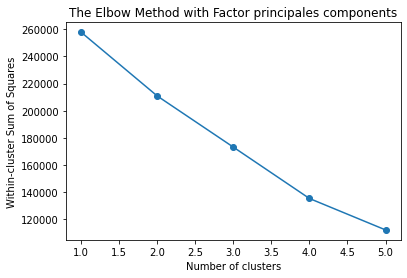

412.447208404541


In [47]:
# calculate distortion for a range of number of cluster
distortions_factor = []
best_params_factor = []
Y_km_factor = [] 
km_best_factor = []
silhouette_scores_factor = []
time_start = time.time()



for i in range(1, 6):
    param_grid = [{
    "n_clusters": [i],
    "max_iter": [1000],
    "tol": np.logspace(-1, 1, 5),
    "init": ["random", "k-means++"],
    "n_init": range(5, 16, 5),
    "random_state": range(0, 16, 5)
}]
    km = KMeans()
    kmElbow = GridSearchCV(km, param_grid)
    kmElbow.fit(X_factor_projected)
    print(i, " Best Params", kmElbow.best_params_)
    best_params_factor.append(kmElbow.best_params_)
    distortions_factor.append(kmElbow.best_estimator_.inertia_)
    
    y_km = kmElbow.best_estimator_.predict(X_factor_projected)
    
    if i > 1:
        silhouette__coef = silhouette_score(X_factor_projected, y_km)
        silhouette_scores_factor.append(silhouette__coef)
    
    print(i, silhouette__coef)
    km_best_factor.append(kmElbow.best_estimator_)   
    Y_km_factor.append(y_km)

# plot
plt.plot(range(1, 6), distortions_factor, marker='o')
plt.title('The Elbow Method with Factor principales components')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()
print(str(time.time()-time_start))

In [56]:
XRetungingIndexes = rawFrame.loc[rawFrame["returningCustomers"] == 1].values
XNonRetungingIndexes = rawFrame.loc[rawFrame["returningCustomers"] == 0].values

X_NMF_RetungingIndexes = nmf.transform(minMaxEncoder.transform(XRetungingIndexes))
X_NMF_Non_RetungingIndexes = nmf.transform(minMaxEncoder.transform(XNonRetungingIndexes))

X_RetungingIndexes_PCA= pca.transform(minMaxEncoder.transform(XRetungingIndexes))
X_Non_RetungingIndexes_PCA = pca.transform(minMaxEncoder.transform(XNonRetungingIndexes))

X_RetungingIndexes_scaled = std_scaler.transform(XRetungingIndexes)
X_Non_RetungingIndexes_scaled = std_scaler.transform(XNonRetungingIndexes)

### Draw Centroids In 2D with Factor

In [21]:
from sklearn.cluster import KMeans
print(filterC)

#we are gonna use the best model so far for visualisation 
print(best_params_nmf[2])

columns = list(rawFrame.columns.values)
silhouette_coefs = []
scatter = plt.figure(figsize=(15,15))
subplotIndex = 1
clusterRange = 7


#not bad pca1 = 0 and pca2=4
#good pca1 = 1 and pca2=4

pca1 = 5
pca2 = 13

for cluster in range(2, clusterRange):
    y_km = Y_km_factor[cluster-1]
    
    print("current cluster ", cluster)

    # plot the n clusters
    ax = scatter.add_subplot(int(clusterRange-4), int(clusterRange-4), subplotIndex)
    for plot in range(0, cluster):
        current_cluster = plot

        ax.scatter(
            X_factor_projected[Y_km_factor[cluster-1] == plot, pca1],
            X_factor_projected[Y_km_factor[cluster-1] == plot, pca2],
            s=20,
            marker=markersList[plot],
            alpha=0.35,
            label='cluster '+str(plot+1)
        )
        ax.set_ylabel(str(columns[pca2]))
        ax.set_xlabel(str(columns[pca1]))
        ax.set_title("Nb Clusters "+ str(cluster))
        ax.set_label('cluster '+str(plot+1))
        # plot the centroids

        ax.scatter(X_RetungingIndexes_scaled[:100, pca1],
                   X_RetungingIndexes_scaled[:100, pca2], marker="s", color="yellow", alpha=0.3, s=15)

        ax.scatter(X_Non_RetungingIndexes_scaled[:100, pca1],
                   X_Non_RetungingIndexes_scaled[:100, pca2], marker="s", color="purple", alpha=0.3, s=15)

        ax.scatter(
            km_best_factor[cluster-1].cluster_centers_[:, pca1], km_best_factor[cluster-1].cluster_centers_[:, pca2],
            s=100, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
    subplotIndex = subplotIndex+1

['NbReviews', 'avgReviewScore', 'customer_stateEnc', 'nbOrders', 'orderLateBool', 'orderLateInDays', 'orderStatusBool', 'order_delivery_length', 'payment_sequential', 'payment_typeEnc', 'price', 'product_category_nameEnc', 'returningCustomers', 'review_score', 'year']


NameError: name 'best_params_nmf' is not defined

### Draw Centroids In 2D with PCA

current cluster  3
current cluster  3
current cluster  3
current cluster  3


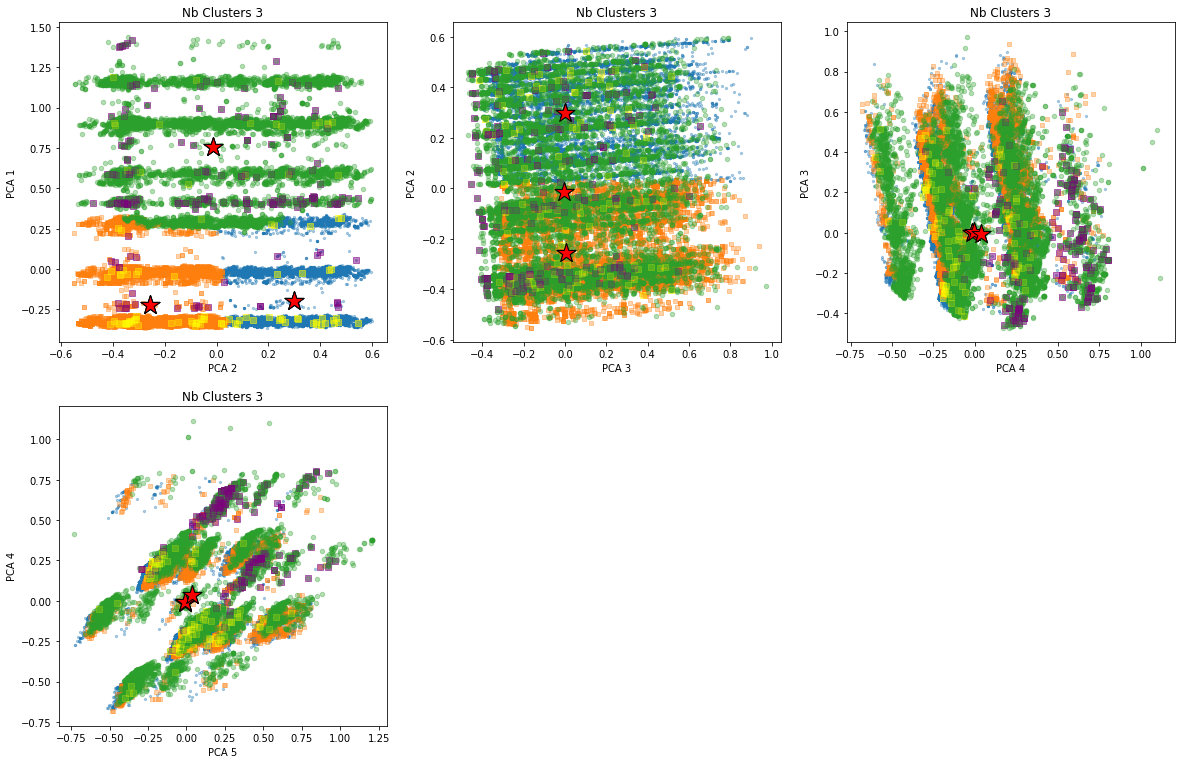

In [68]:
#we are gonna use the best model so far for visualisation 
scatter = plt.figure(figsize=(20,20))
subplotIndex = 1
clusterRange = 4


#not bad pca1 = 0 and pca2=4
#good pca1 = 1 and pca2=4

for pca in range(1, 5):
    pca1 = pca
    pca2 = pca-1

    for cluster in range(3, clusterRange):
        y_km = Y_km_pca[cluster-1]

        print("current cluster ", cluster)

        # plot the n clusters
        ax = scatter.add_subplot(int(clusterRange-1), int(clusterRange-1), subplotIndex)
        for plot in range(0, cluster):
            current_cluster = plot

            ax.scatter(
                X__pca_projected[y_km == plot, pca1],
                X__pca_projected[y_km == plot, pca2],
                s=20,
                marker=markersList[plot],
                alpha=0.35,
                label='cluster '+str(plot+1)
            )
            ax.set_ylabel("PCA " + str(pca2+1))
            ax.set_xlabel("PCA " + str(pca1+1))
            ax.set_title("Nb Clusters "+ str(cluster))
            ax.set_label('cluster '+str(plot+1))
            # plot the centroids

            ax.scatter(X_Non_RetungingIndexes_PCA[:100, pca1],
                       X_Non_RetungingIndexes_PCA[:100, pca2], marker="s", color="yellow", alpha=0.2, s=35)

            ax.scatter(X_RetungingIndexes_PCA[:200, pca1],
                       X_RetungingIndexes_PCA[:200, pca2], marker="s", color="purple", alpha=0.2, s=35)

            ax.scatter(
                km_best_pca[cluster-1].cluster_centers_[:, pca1], km_best_pca[cluster-1].cluster_centers_[:, pca2],
                s=400, marker='*',
                c='red', edgecolor='black',
                label='centroids'
            )
        subplotIndex = subplotIndex+1

### Draw Centroids In 2D with NMF

['NbReviews', 'avgReviewScore', 'customer_stateEnc', 'nbOrders', 'orderLateBool', 'orderLateInDays', 'orderStatusBool', 'order_delivery_length', 'order_statusEnc', 'payment_sequential', 'payment_typeEnc', 'price', 'product_category_nameEnc', 'returningCustomers', 'review_score', 'seller_stateEnc', 'year']
{'init': 'random', 'max_iter': 1000, 'n_clusters': 3, 'n_init': 10, 'random_state': 0, 'tol': 0.1}
current cluster  2
current cluster  3
current cluster  4
current cluster  5
current cluster  2
current cluster  3
current cluster  4


KeyboardInterrupt: 

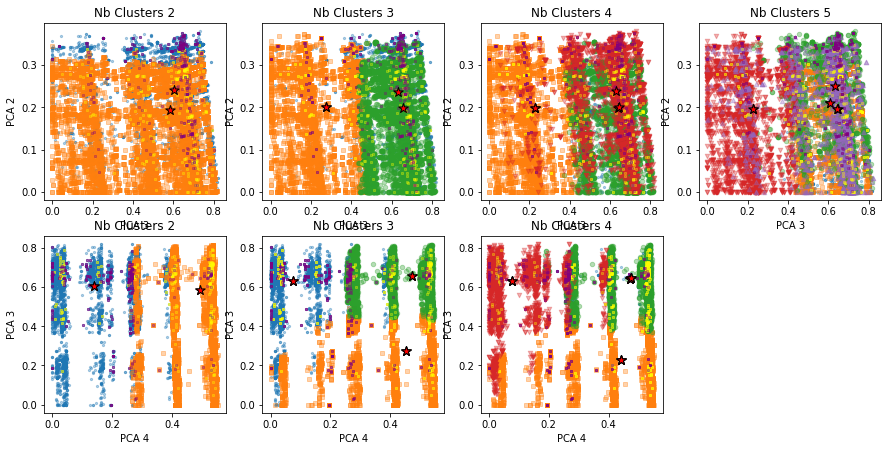

In [115]:
from sklearn.cluster import KMeans
print(filterC)

#we are gonna use the best model so far for visualisation 
print(best_params_nmf[2])

columns = list(rawFrame.columns.values)
silhouette_coefs_nmf = []
scatter = plt.figure(figsize=(15,15))
subplotIndex = 1
clusterRange = 5


#not bad pca1 = 0 and pca2=4
#good pca1 = 2 and pca2=1

for pca in range(2, 5):
    pca1 = pca
    pca2 = pca-1

    for cluster in range(3, 4):
        y_km = Y_km_NMF[cluster-1]
        silhouette_coef = silhouette_score(X_nmf_projected, y_km)
        print("current cluster ", cluster)

        # plot the n clusters
        ax = scatter.add_subplot(int(clusterRange-1), int(clusterRange-1), subplotIndex)
        for plot in range(0, cluster):
            current_cluster = plot

            ax.scatter(
                X_nmf_projected[y_km == plot, pca1],
                X_nmf_projected[y_km == plot, pca2],
                s=20,
                marker=markersList[plot],
                alpha=0.35,
                label='cluster '+str(plot+1)
            )
            ax.set_ylabel("PCA " + str(pca2+1))
            ax.set_xlabel("PCA " + str(pca1+1))
            ax.set_title("Nb Clusters "+ str(cluster))
            ax.set_label('cluster '+str(plot+1))
            # plot the centroids

            ax.scatter(X_NMF_Non_RetungingIndexes[:300, pca1],
                       X_NMF_Non_RetungingIndexes[:300, pca2], marker="s", color="yellow", alpha=0.3, s=5)

            ax.scatter(X_NMF_RetungingIndexes[:300, pca1],
                       X_NMF_RetungingIndexes[:300, pca2], marker="s", color="purple", alpha=0.3, s=5)

            ax.scatter(
                km_best[cluster-1].cluster_centers_[:, pca1], km_best[cluster-1].cluster_centers_[:, pca2],
                s=100, marker='*',
                c='red', edgecolor='black',
                label='centroids'
            )
        subplotIndex = subplotIndex+1



# Silhouette Coef

Text(0, 0.5, 'Silhouette')

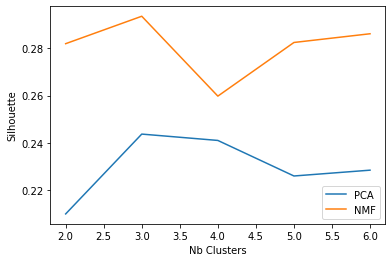

In [84]:
silhouette_scores_pca[0] = 0.21
plt.plot(range(2, 7), silhouette_scores_pca[:5], label="PCA")

plt.plot(range(2, 7), silhouette_scores[:5], label="NMF")
plt.legend()
plt.xlabel("Nb Clusters")
plt.ylabel("Silhouette")

best nb clusters is 3

# In 3D

['NbReviews', 'avgReviewScore', 'customer_stateEnc', 'nbOrders', 'orderLateBool', 'orderLateInDays', 'orderStatusBool', 'order_delivery_length', 'order_statusEnc', 'payment_sequential', 'payment_typeEnc', 'price', 'product_category_nameEnc', 'returningCustomers', 'review_score', 'seller_stateEnc', 'year']


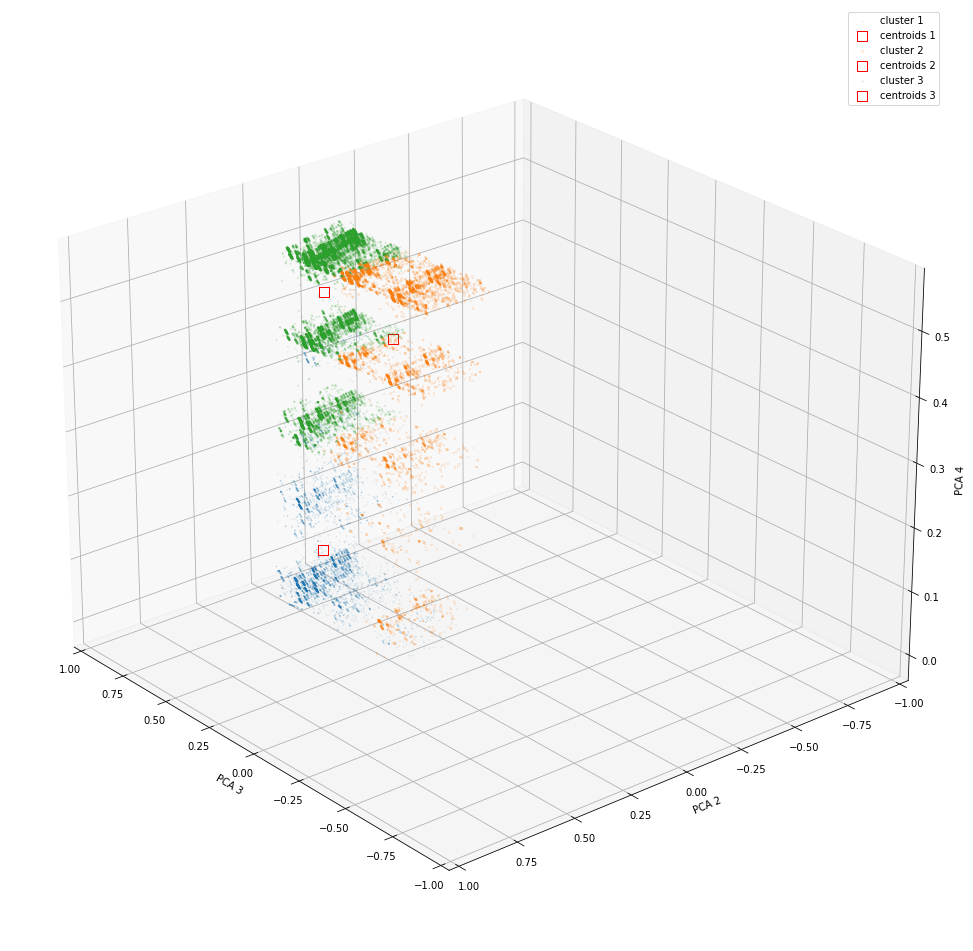

In [98]:
from sklearn.cluster import KMeans
print(filterC)


Xkmeans = mergedFrame1000.dropna().filter(items=filterC).values
#Xkmeans = X_delivered.dropna().filter(items=filterC).sample(1000).values
Xscaled = preprocessing.StandardScaler().fit_transform(Xkmeans)
columns = list(mergedFrame1000.dropna().filter(items=filterC).columns.values)
silhouette_coefs = []
scatter = plt.figure(figsize=(100,100))
subplotIndex = 1
clusterRange = 10

pca1 = 2
pca2 = 1
pca3 = 3

for cluster in range(3, 4):
    km = KMeans(
        n_clusters=cluster,
        n_init=10,
        max_iter=1000,
        tol=0.1,
        random_state=0
    )

    #km.fit_transform(X_factor_projected)
    y_km = Y_km_NMF[cluster-1]
    #silhouette_coef = silhouette_score(X_nmf_projected, y_km)
    #silhouette_coefs.append(silhouette_coef)
    
    ax = scatter.add_subplot(int(clusterRange-5), int(clusterRange-6), subplotIndex, projection='3d')
    for plot in range(0, cluster):
        current_cluster = plot
        #print((cluster-1), (cluster-1), subplotIndex)

        ax.scatter(
            X_nmf_projected[y_km == plot, pca1],
            X_nmf_projected[y_km == plot, pca2],
            X_nmf_projected[y_km == plot, pca3],
            s=2, #c='lightgreen',
            marker=markersList[plot], 
            alpha=0.1,
            #facecolor="none",
            #edgecolor='black',
            label='cluster '+str(plot+1)
        )
        ax.view_init(25, 140)
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.set_ylabel("PCA "+str(pca2+1))
        ax.set_xlabel("PCA "+str(pca1+1))
        ax.set_zlabel("PCA "+str(pca3+1))

        ax.set_label('cluster '+str(plot+1))
        
        #plot the references for interpretability
        #ax.scatter(X_NMF_Non_RetungingIndexes[:300, pca1],
        #           X_NMF_Non_RetungingIndexes[:300, pca2], 
        #           X_NMF_Non_RetungingIndexes[:300, pca3],
        #           label='Returning Customers',
         #          marker="s", color="yellow", alpha=0.5, s=5)

        #ax.scatter(X_NMF_RetungingIndexes[:300, pca1],
        #           X_NMF_RetungingIndexes[:300, pca2], 
        #           X_NMF_RetungingIndexes[:300, pca3], 
        #           label='Non Returning Customers',
        #           marker="s", color="purple", alpha=0.5, s=5)
        
        
        # plot the centroids
        ax.scatter(
        #km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
         km_best[cluster-1].cluster_centers_[:, pca1], km_best[cluster-1].cluster_centers_[:, pca2], km_best[cluster-1].cluster_centers_[:, pca3],
            s=100, marker='s',
            #c='red', 
            edgecolor='red', 
            facecolor="none", 
            alpha=1,
            label='centroids ' + str(plot+1)
        )
        ax.legend()
    subplotIndex = subplotIndex+1
    #plt.legend(scatterpoints=1)
    #plt.grid()
    #plt.show()

['returningCustomers', 'review_score', 'nbOrders', 'orderStatusBool', 'NbReviews', 'avgReviewScore', 'year', 'orderLateBool', 'seller_stateEnc', 'payment_typeEnc', 'customer_stateEnc', 'order_statusEnc', 'price', 'product_category_nameEnc', 'payment_sequential', 'order_delivery_length', 'orderLateInDays']


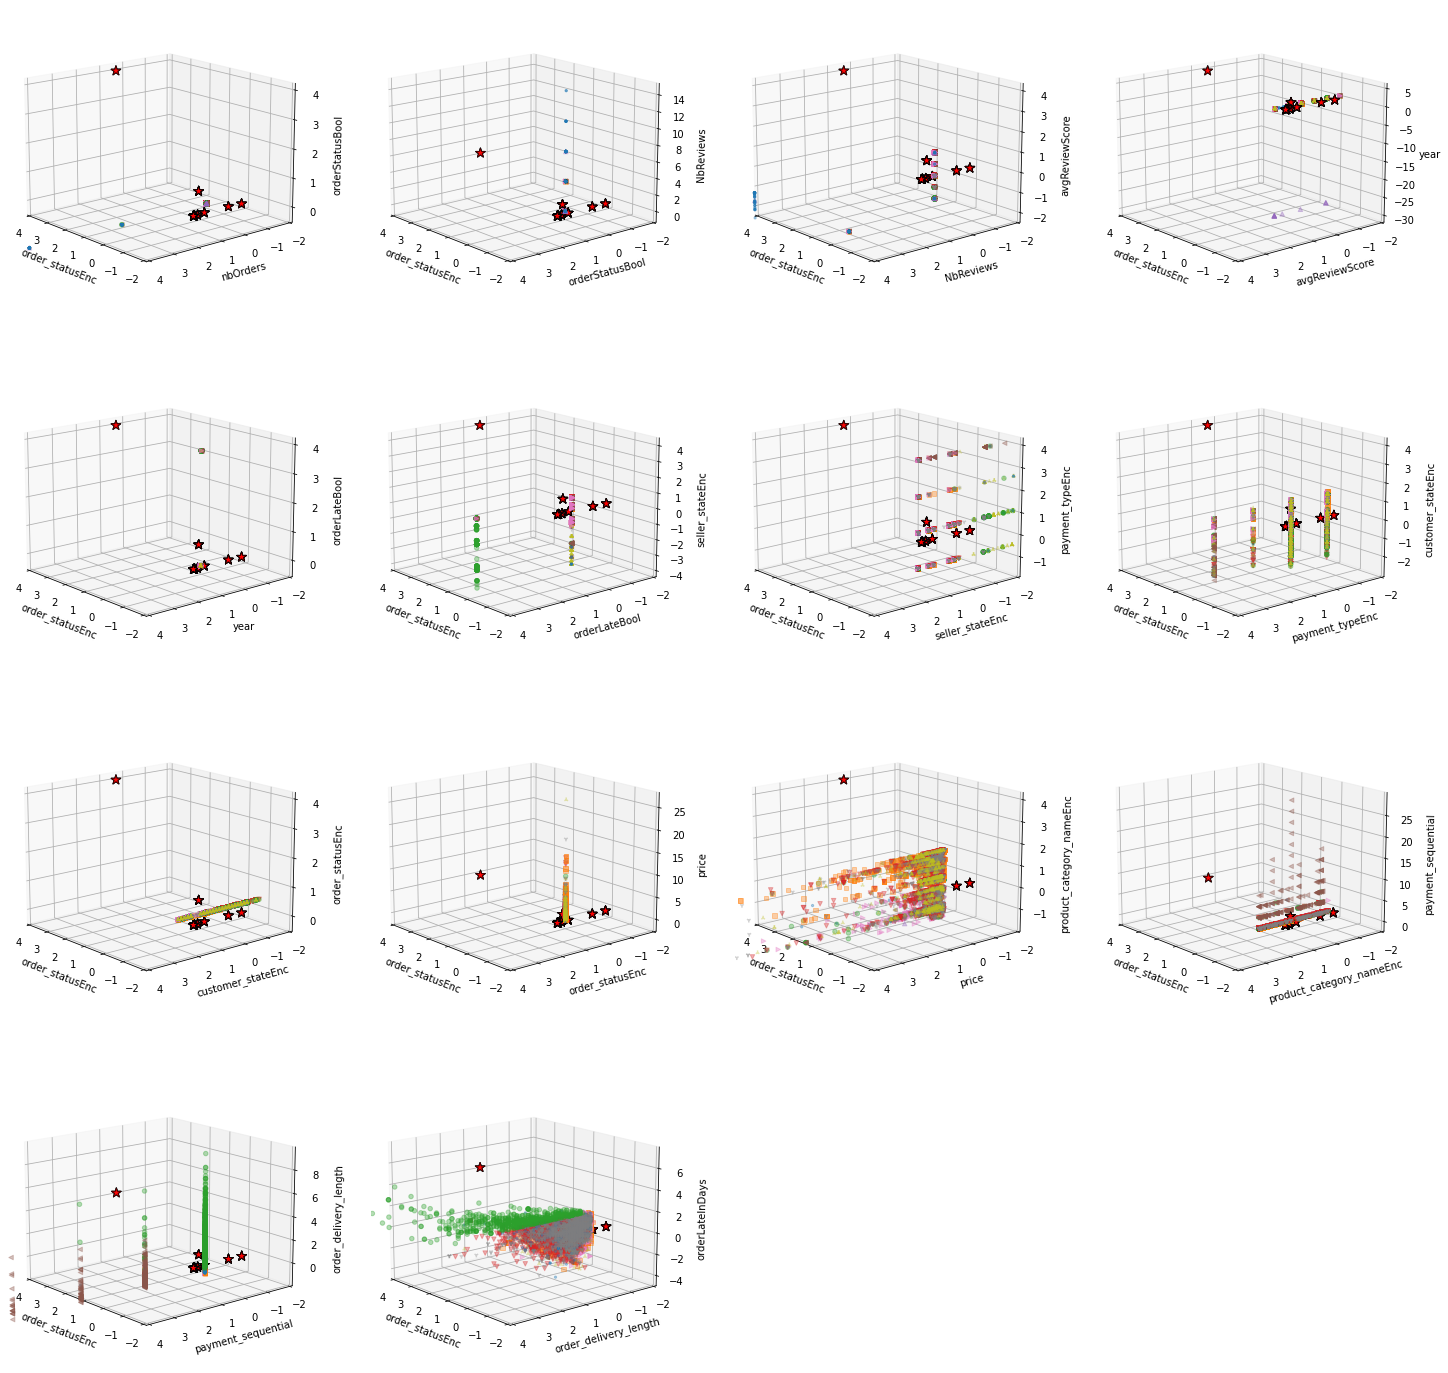

In [48]:
#iterate with the best number of clusters according to silhouette coef
from sklearn.cluster import KMeans
print(filterC)


#Xkmeans = mergedFrame1000.dropna().filter(items=filterC).values
Xkmeans = X_delivered.dropna().filter(items=filterC).values
Xscaled = preprocessing.StandardScaler().fit_transform(Xkmeans)
columns = list(X_delivered.dropna().filter(items=filterC).columns.values)
scatter = plt.figure(figsize=(25,25))
subplotIndex = 1
clusterRange = 10

cluster = cluster

for pca in range(0, (len(columns)-3)):
    km = KMeans(
        n_clusters=cluster,
        init='k-means++',
        n_init=10, max_iter=1000,
        tol=1e-04, random_state=0
    )


    pca1 = 11
    pca2 = pca+2
    pca3 = pca+3
    #km.fit_transform(X_factor_projected)
    y_km = km.fit_predict(Xscaled)
    #print(cluster, "y_km", X_nmf_projected[y_km == 0])
    # plot the n clusters
    ax = scatter.add_subplot(int(clusterRange-6), int(clusterRange-6), subplotIndex, projection='3d')
    for plot in range(0, cluster):
        current_cluster = plot
        #print((cluster-1), (cluster-1), subplotIndex)

        ax.scatter(
            Xscaled[y_km == plot, pca1],
            Xscaled[y_km == plot, pca2],
            Xscaled[y_km == plot, pca3],
            s=20, #c='lightgreen',
            marker=markersList[plot], alpha=0.35,
            #facecolor="none",
            #edgecolor='black',
            label='cluster '+str(plot+1)
        )
        ax.view_init(15, 140)
        ax.set_xlim([-2, 4])
        ax.set_ylim([-2, 4])
        ax.set_ylabel(str(columns[pca2]))
        ax.set_xlabel(str(columns[pca1]))
        ax.set_zlabel(str(columns[pca3]))
        ax.set_label('cluster '+str(plot+1))
        # plot the centroids



        ax.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
            s=100, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
    subplotIndex = subplotIndex+1
    #plt.legend(scatterpoints=1)
    #plt.grid()
    #plt.show()

# DbScan Clustering


filter ['review_score', 'nbOrders', 'orderStatusBool', 'NbReviews', 'avgReviewScore', 'year', 'orderLateBool', 'seller_stateEnc', 'payment_typeEnc', 'customer_stateEnc', 'order_statusEnc', 'price', 'product_category_nameEnc', 'payment_sequential', 'order_delivery_length', 'orderLateInDays']
[1.00000000e-10 4.89390092e-10 2.39502662e-09 1.17210230e-08
 5.73615251e-08 2.80721620e-07 1.37382380e-06 6.72335754e-06
 3.29034456e-05 1.61026203e-04 7.88046282e-04 3.85662042e-03
 1.88739182e-02 9.23670857e-02 4.52035366e-01 2.21221629e+00
 1.08263673e+01 5.29831691e+01 2.59294380e+02 1.26896100e+03
 6.21016942e+03 3.03919538e+04 1.48735211e+05 7.27895384e+05
 3.56224789e+06 1.74332882e+07 8.53167852e+07 4.17531894e+08
 2.04335972e+09 1.00000000e+10]
columns ['review_score', 'nbOrders', 'orderStatusBool', 'NbReviews', 'avgReviewScore', 'year', 'orderLateBool', 'seller_stateEnc', 'payment_typeEnc', 'customer_stateEnc', 'order_statusEnc', 'price', 'product_category_nameEnc', 'payment_sequential', 

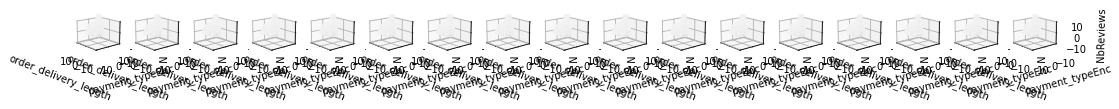

In [49]:
from sklearn.cluster import DBSCAN

#fullFrame = newCols + list(intColumn["columns"].values)
#fullFrame  = fullFrame + list(floatColumn["columns"].values)
#print("Orders value", np.unique(mergedFrame1000["order_statusEnc"].values))

fullFrame = filterC
print("filter", filterC[1:20])

from matplotlib import cm
viridis = cm.get_cmap('Pastel1', 128)

#Xkmeans = mergedFrame1000.dropna().filter(items=filterC).values
#Xkmeans = X_delivered.dropna().filter(items=fullFrame[1:18]).sample(8000).values
Xkmeans = mergedFrame1000.dropna().filter(items=fullFrame[1:20]).sample(8000).values
Xscaled = preprocessing.StandardScaler().fit_transform(Xkmeans)
columns = list(mergedFrame1000.dropna().filter(items=fullFrame[1:20]).columns.values)
silhouette_coefs_dbscan = []
scatter = plt.figure(figsize=(25,25))
subplotIndex = 1
clusterRange = 30

epsRange = np.logspace(-10, 10, clusterRange)
print(epsRange)
print("columns", fullFrame[1:clusterRange])




#print(plt.cm.get_cmap("hsv", 2))

pca1 = 14
pca2 = 8
pca3 = 3

for e in epsRange:
    db = DBSCAN(
        eps=e, min_samples=10
    )
    colors = []
    #km.fit_transform(X_factor_projected)
    dbscan = db.fit(Xscaled)
    Y_dbscan = db.labels_
    #print("Y_dbscan", len(Y_dbscan))
    for y in range(len(Y_dbscan)):
        colors.append(viridis(y))


    #print(np.unique(Y_dbscan))
    if len(np.unique(Y_dbscan)) > 1:# and subplotIndex < len(fullFrame[1:17]):
        silhouette_coef = silhouette_score(Xscaled, Y_dbscan)
        silhouette_coefs_dbscan.append(silhouette_coef)
        #print(silhouette_coef)

        # plot the n clusters
        ax = scatter.add_subplot(int(clusterRange-6), int(clusterRange-6), subplotIndex, projection='3d')
        for plot in range(0, cluster):
            current_cluster = plot
            print((cluster-1), (cluster-1), subplotIndex)

            ax.scatter(
                Xscaled[:, pca1],
                Xscaled[:, pca2],
                Xscaled[:, pca3],
                s=20, #c = Y_dbscan,
                marker=markersList[plot],
                alpha=0.35,
                #facecolor="none",
                facecolor=colors,
                label='cluster '+str(plot+1)
            )
            ax.view_init(15, 140)
            ax.set_xlim([-10, 10])
            ax.set_ylim([-10, 10])
            ax.set_zlim([-10, 10])
            ax.set_ylabel(str(columns[pca2]))
            ax.set_xlabel(str(columns[pca1]))
            ax.set_zlabel(str(columns[pca3]))
            #ax.set_label('cluster '+str(plot+1))
            # plot the centroids

        subplotIndex = subplotIndex+1
    #plt.legend(scatterpoints=1)
    #plt.grid()
    #plt.show()

In [99]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
viridis = cm.get_cmap('Blues', 128)
print(viridis(20))

(0.8461324687355257, 0.9052647830785857, 0.9604755287941948, 1.0)


# Clusters Stability 



current cluster  3
current cluster  3
current cluster  3
current cluster  3
current cluster  3
current cluster  3
current cluster  3


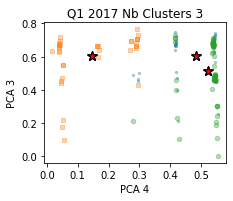

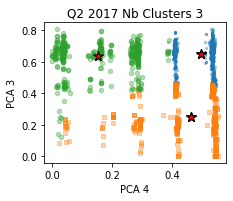

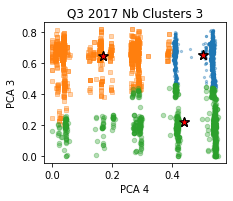

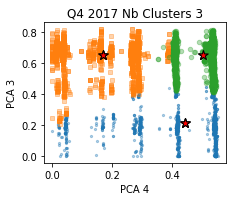

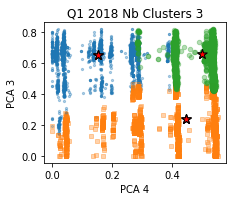

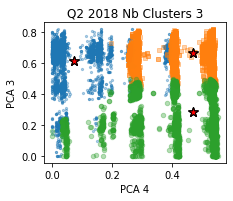

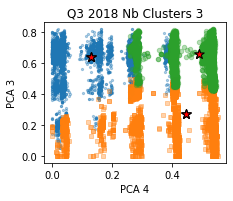

In [114]:
mergedFrame1000["quarter"] = mergedFrame1000['order_purchase_timestamp'].dt.quarter
uniqueYears = np.unique(mergedFrame1000["year"].values)

silhouette_year = []


for year in uniqueYears:
    currentYearFrame = mergedFrame1000[mergedFrame1000["year"] == year]
    currentQuarters = np.unique(mergedFrame1000["quarter"].values)
    for quarter in currentQuarters:
        currentQuarter = currentYearFrame[currentYearFrame["quarter"] == quarter]
        if len(currentQuarter['order_purchase_timestamp'].values):
            firstOrder = np.min(currentQuarter['order_purchase_timestamp'].values)
            adjustedFrame = mergedFrame1000[mergedFrame1000['order_purchase_timestamp'] <= firstOrder]
            if len(adjustedFrame) > 100: 
                adjustedFrameNmf = nmf.transform(minMaxScaler.transform(adjustedFrame.filter(items=filterC).dropna().values))
                
                
                km = KMeans(init= 'random', max_iter= 1000, n_clusters=3, n_init=10, random_state=0, tol=0.1)
                km.fit(adjustedFrameNmf)

                y_km = km.predict(adjustedFrameNmf)
                
                columns = list(rawFrame.columns.values)
                silhouette_coefs_nmf = []
                scatter = plt.figure(figsize=(15,15))
                subplotIndex = 1
                clusterRange = 5


                #not bad pca1 = 0 and pca2=4
                #good pca1 = 2 and pca2=1

                for pca in range(3, 4):
                    pca1 = pca
                    pca2 = pca-1

                    for cluster in range(3, 4):
                        #silhouette_coef = silhouette_score(X_nmf_projected, y_km)
                        print("current cluster ", cluster)

                        # plot the n clusters
                        ax = scatter.add_subplot(int(clusterRange), int(4), subplotIndex)
                        for plot in range(0, cluster):
                            current_cluster = plot

                            ax.scatter(
                                adjustedFrameNmf[y_km == plot, pca1],
                                adjustedFrameNmf[y_km == plot, pca2],
                                s=20,
                                marker=markersList[plot],
                                alpha=0.35,
                                label='cluster '+str(plot+1)
                            )
                            ax.set_ylabel("PCA " + str(pca2+1))
                            ax.set_xlabel("PCA " + str(pca1+1))
                            ax.set_title("Q"+str(quarter)+ ' '+ str(year) + " Nb Clusters "+ str(cluster))
                            ax.set_label('cluster '+str(plot+1))
                            # plot the centroids

                            #ax.scatter(X_NMF_Non_RetungingIndexes[:300, pca1],
                             #          X_NMF_Non_RetungingIndexes[:300, pca2], marker="s", color="yellow", alpha=0.3, s=5)

                            ##ax.scatter(X_NMF_RetungingIndexes[:300, pca1],
                            #           X_NMF_RetungingIndexes[:300, pca2], marker="s", color="purple", alpha=0.3, s=5)

                            ax.scatter(
                                km.cluster_centers_[:, pca1], km.cluster_centers_[:, pca2],
                                s=100, marker='*',
                                c='red', edgecolor='black',
                                label='centroids'
                            )
                        subplotIndex = subplotIndex+1

- Stabilty of the centroids 
- Stabilty of the clusters 

# Returning Customer Caracteristics

In [131]:
returningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 1]
NreturningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 0]


XRetungingIndexes = rawFrame.loc[rawFrame["returningCustomers"] == 1]
XNonRetungingIndexes = rawFrame.loc[rawFrame["returningCustomers"] == 0]

XRetungingIndexesLate = XRetungingIndexes.loc[XRetungingIndexes["orderLateBool"] == 1].values
XRetungingIndexesNonLate = XRetungingIndexes.loc[XRetungingIndexes["orderLateBool"] == 0].values

XNonRetungingIndexesLate = XNonRetungingIndexes.loc[XNonRetungingIndexes["orderLateBool"] == 1].values
XNonRetungingIndexesNonLate = XNonRetungingIndexes.loc[XNonRetungingIndexes["orderLateBool"] == 0].values

X_NMF_RetungingIndexes = nmf.transform(minMaxEncoder.transform(XRetungingIndexes.values))
X_NMF_RetungingIndexesLate = nmf.transform(minMaxEncoder.transform(XRetungingIndexesLate))
X_NMF_RetungingIndexesNonLate = nmf.transform(minMaxEncoder.transform(XRetungingIndexesNonLate))

X_NMF_Non_RetungingIndexes = nmf.transform(minMaxEncoder.transform(XNonRetungingIndexes.values))
X_NMF_Non_RetungingIndexesLate = nmf.transform(minMaxEncoder.transform(XNonRetungingIndexesLate))
X_NMF_Non_RetungingIndexesNonLate = nmf.transform(minMaxEncoder.transform(XNonRetungingIndexesNonLate))


['NbReviews', 'avgReviewScore', 'customer_stateEnc', 'nbOrders', 'orderLateBool', 'orderLateInDays', 'orderStatusBool', 'order_delivery_length', 'order_statusEnc', 'payment_sequential', 'payment_typeEnc', 'price', 'product_category_nameEnc', 'returningCustomers', 'review_score', 'seller_stateEnc', 'year']
{'init': 'random', 'max_iter': 1000, 'n_clusters': 3, 'n_init': 10, 'random_state': 0, 'tol': 0.1}
current cluster  3


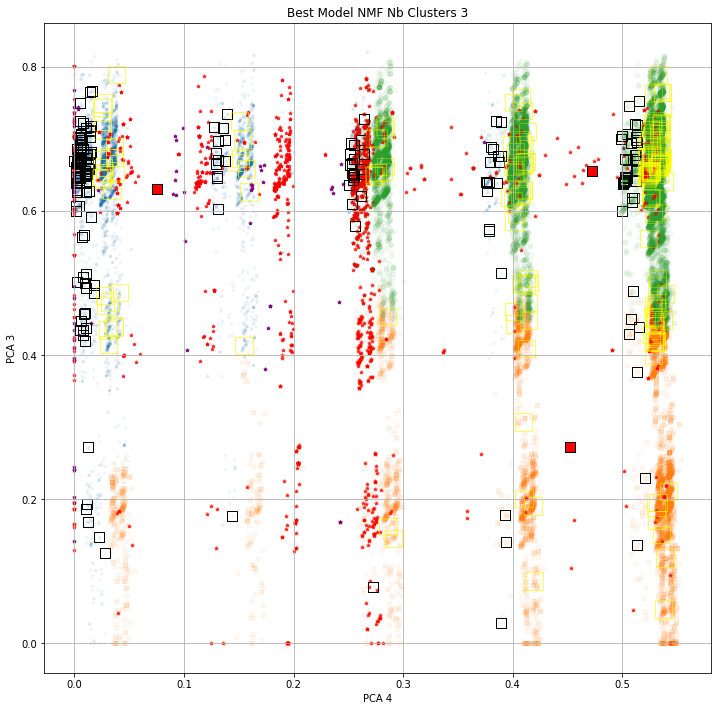

In [158]:
from sklearn.cluster import KMeans
print(filterC)

#we are gonna use the best model so far for visualisation 
print(best_params_nmf[2])

columns = list(rawFrame.columns.values)
silhouette_coefs_nmf = []
scatter = plt.figure(figsize=(55,55))
subplotIndex = 1
clusterRange = 5


#not bad pca1 = 0 and pca2=4
#good pca1 = 2 and pca2=1


pca1 = 3
pca2 = 2

for cluster in range(3, 4):
    y_km = Y_km_NMF[cluster-1]
    print("current cluster ", cluster)

    # plot the n clusters
    ax = scatter.add_subplot(int(clusterRange-1), int(clusterRange-1), subplotIndex)
    for plot in range(0, cluster):
        current_cluster = plot

        ax.scatter(
            X_nmf_projected[y_km == plot, pca1],
            X_nmf_projected[y_km == plot, pca2],
            s=20,
            marker=markersList[plot],
            alpha=0.05,
            label='cluster '+str(plot+1)
        )
        ax.set_ylabel("PCA " + str(pca2+1))
        ax.set_xlabel("PCA " + str(pca1+1))
        ax.set_title("Best Model NMF Nb Clusters "+ str(cluster))
        ax.set_label('cluster '+str(plot+1))
        # plot the centroids


        ax.scatter(X_NMF_RetungingIndexesLate[:, pca1],
                   X_NMF_RetungingIndexesLate[:, pca2],
                   label="Returning Late",
                   marker="*", color="Purple", alpha=0.45, s=10)
        
        ax.scatter(X_NMF_RetungingIndexesNonLate[:, pca1],
                   X_NMF_RetungingIndexesNonLate[:, pca2],
                   label="Returning Non Late",
                   marker="*", color="Red", alpha=0.3, s=10)
        
        ax.scatter(X_NMF_Non_RetungingIndexesLate[:200, pca1],
                   X_NMF_Non_RetungingIndexesLate[:200, pca2], 
                   label="NonReturning Late",
                   edgecolor='black', 
                   facecolor="none",
                   marker="s", 
                   #color="black",
                   alpha=0.7, s=100)
        
        ax.scatter(X_NMF_Non_RetungingIndexesNonLate[:200, pca1],
               X_NMF_Non_RetungingIndexesNonLate[:200, pca2], 
               label="NonReturning Non Late",
               edgecolor='yellow', 
               facecolor="none",
               marker="s", 
               #color="black", 
               alpha=0.3, s=300)

       

        ax.scatter(
            km_best[cluster-1].cluster_centers_[:, pca1], km_best[cluster-1].cluster_centers_[:, pca2],
            s=100, marker='s',
            c='red', edgecolor='black',
            label='centroids'
        )
        ax.grid()
        #ax.legend()
    subplotIndex = subplotIndex+1

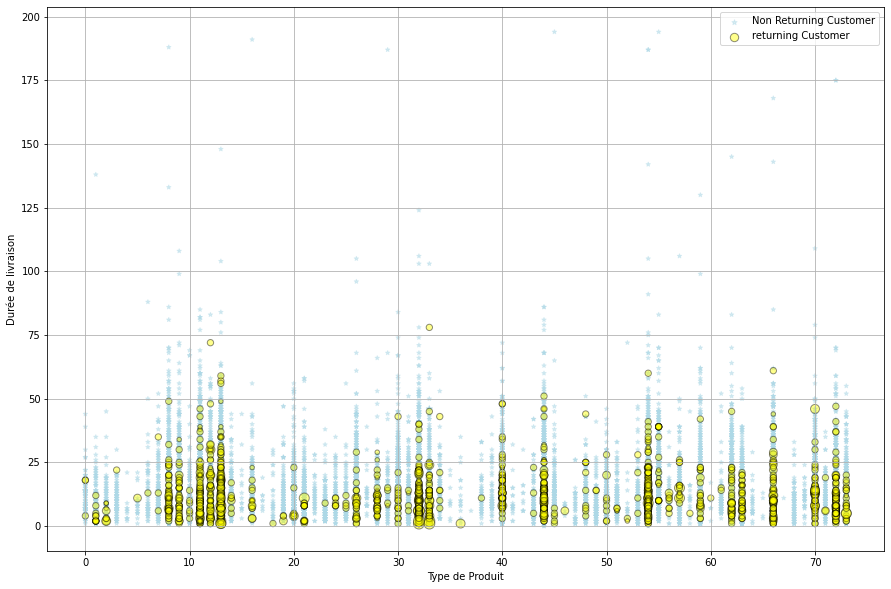

In [102]:
plt.figure(figsize=(15,10))

plt.scatter(NreturningC["product_category_nameEnc"], NreturningC['order_delivery_length'],
            c="lightblue", alpha=0.45,marker="*", s=NreturningC['NbReviews'].values*20,
            label="Non Returning Customer")


plt.scatter(returningC["product_category_nameEnc"], returningC['order_delivery_length'],
            c="yellow", alpha=0.45, edgecolor="black", s=returningC['NbReviews'].values*20,
            label='returning Customer')


plt.grid()
plt.ylabel("Durée de livraison")
plt.xlabel("Type de Produit")
plt.legend(scatterpoints=1)

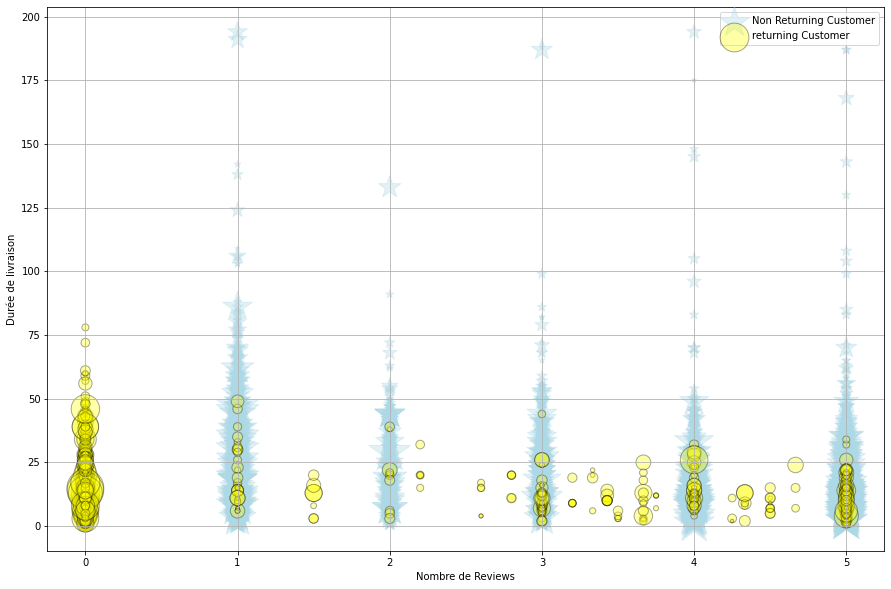

In [105]:
plt.figure(figsize=(15,10))

plt.scatter(NreturningC["avgReviewScore"], NreturningC['order_delivery_length'],
            c="lightblue", alpha=0.35,marker="*", s=NreturningC['price'].values,
            label="Non Returning Customer")


plt.scatter(returningC["avgReviewScore"], returningC['order_delivery_length'],
            c="yellow", alpha=0.35, edgecolor="black", s=returningC['price'].values,
            label='returning Customer')


plt.grid()
plt.ylabel("Durée de livraison")
plt.xlabel("Nombre de Reviews")
plt.legend(scatterpoints=1)

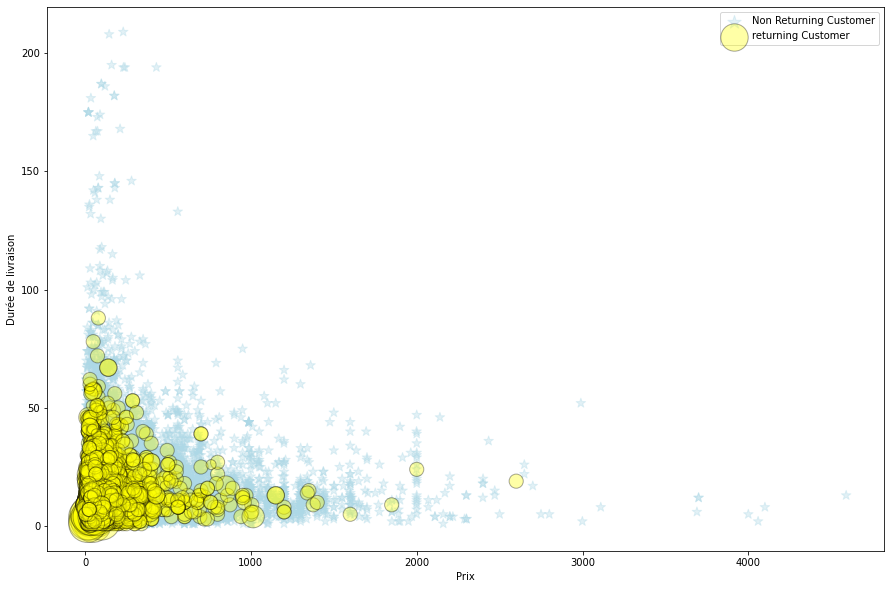

In [65]:
returningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 1]
NreturningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 0]

plt.figure(figsize=(15,10))

plt.scatter(NreturningC["price"], NreturningC['order_delivery_length'], s=NreturningC['NbReviews']*100, #projection='3d',
            c="lightblue", alpha=0.35,marker="*",# s=NreturningC['NbReviews'].values*20,
            label="Non Returning Customer")


plt.scatter(returningC["price"], returningC['order_delivery_length'], s=returningC['NbReviews']*100 , #projection='3d',
            c="yellow", alpha=0.35, edgecolor="black", #s=returningC['NbReviews'].values*20,
            label='returning Customer')



plt.ylabel("Durée de livraison")
plt.xlabel("Prix")
plt.legend(scatterpoints=1)

<AxesSubplot:>

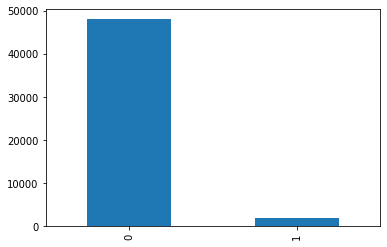

In [104]:
mergedFrame1000["returningCustomers"].value_counts().plot(kind="bar")

# Old method for feature engineering

In [ ]:
#add NbOrders - much slower
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
nbOrders = []
for ids in customerIds:
    idx = mergedFrame1000["customer_unique_id"].loc[mergedFrame1000["customer_unique_id"] == ids]
    orders = mergedFrame1000["order_id"].iloc[idx.index.values]
    uniqueOrders = np.unique(orders.values)
    nbOrders.append(len(uniqueOrders))
mergedFrame1000["nbOrders"] = nbOrders
print(str(time.time()-start_time))

In [ ]:
#add avgReviewScore - with iterrows
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
avgReviewScore = []
for index, row in mergedFrame1000.iterrows():
    currentCustomer = row["customer_unique_id"]
    if row["NbReviews"] >=1:
        currentCustomerRows = mergedFrame1000["customer_unique_id"].loc[mergedFrame1000["customer_unique_id"] == currentCustomer]
        filters = mergedFrame1000.iloc[currentCustomerRows.index.values]
        #print(np.unique(currentCustomerRows.index.values))
        avgScore = np.average(filters["review_score"])
        #print(index, avgScore)
        avgReviewScore.append(avgScore)
    else:
        avgReviewScore.append(0)
mergedFrame1000["avgReviewScore"] = avgReviewScore
print(str(time.time()-start_time))

